In [1]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import math
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv

### 1. Samsung_Electronics.csv은 날짜 별 삼성전자 주식 데이터이다. 해당 csv 파일의 'Close'열만 추출하여 stock_data에 저장하시오.

In [58]:
# 코드 작성
dataset = read_csv('Samsung_Electronics.csv').values
# neural network의 입력은 2d array만 가능
stock_data = dataset[:,3:4]
stock_data.shape

(248, 1)

### 2. stock_data의 범위가 0~5가 되도록 크기를 조절한 후, StockData에 저장하시오.

In [59]:
# 코드 작성
StockData = MinMaxScaler(feature_range=(0,5))
# MinMaxScaler(feature_range=(a,b)): 입력을 최소값이 a이고 최대값이 b가 되도록 변형함
StockData.fit(stock_data)

MinMaxScaler(feature_range=(0, 5))

### 3. train_data(학습데이터)와 test_data(테스트데이터)를 75:25의 비율로 분리한 후, 각 데이터의 수를 확인하시오.

In [63]:
# 코드 작성
train_data,test_data = train_test_split(stock_data,test_size=0.25,shuffle=False)

train_data = StockData.transform(train_data)
test_data = StockData.transform(test_data)

train_data.shape, test_data.shape

((186, 1), (62, 1))

### 4. 7일 간의 데이터로 다음 날의 주식 값을 예측할 수 있는 데이터 형태로 변형하시오. (x: 7일 간 주식 값, y: 다음 날 주식 값)

- train_x, train_y, test_x, test_y로 분리하시오.

In [64]:
# 코드 작성
def create_dataset(dataset,num_past):
    X = []
    y = []
    for i in range(len(dataset)-num_past):
        X_tmp = dataset[i:i+num_past]
        y_tmp = dataset[i+num_past]

        X.append(X_tmp)
        y.append(y_tmp)

    return np.array(X),np.array(y)

past = 7
train_x, train_y = create_dataset(train_data, past)
test_x, test_y = create_dataset(test_data, past)

### 5. train_x, train_y, test_x, test_y의 행과 열의 수(shape)를 확인하고, x와 y가 각각 어떠한 데이터를 의미하는지 간단히 서술하시오.

In [65]:
# 코드 작성
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

(179, 7, 1) (179, 1) (55, 7, 1) (55, 1)


train_x와 test_x는 2d array로 보이며, train_y, test_y는 1d array로 확인이 된다.

### 6. RNN model에 적용할 수 있도록 train_x과 test_x를 3D array로 변형하시오.

- 3D로 변형한 데이터를 각각 trainX, testX에 저장하시오.

In [66]:
# 코드 작성
trainX = train_x.reshape((train_x.shape[0], train_x.shape[1], 1))
train_y = train_y.ravel()
testX = test_x.reshape((test_x.shape[0], test_x.shape[1], 1))
test_y = test_y.ravel()

### 7. 아래 코드를 완성하여 RNN model을 구성하시오.

In [67]:
# 코드 완성
model = Sequential([
                    SimpleRNN(10, input_shape=(7, 1)),
                    Dense(1, activation='linear'),
                    ])

In [68]:
model.compile(optimizer = 'adam', loss = 'mse')

### 8. batch size은 1, epochs은 100으로 설정하고, 위의 학습데이터를 적용하여 RNN model을 학습하시오.

In [69]:
# 코드 작성
result = model.fit(trainX, train_y, batch_size=1, epochs = 100)

Epoch 1/100
179/179 [==============================] - 0s 530us/step - loss: 3.5366
Epoch 2/100
179/179 [==============================] - 0s 483us/step - loss: 0.6845
Epoch 3/100
179/179 [==============================] - 0s 485us/step - loss: 0.3017
Epoch 4/100
179/179 [==============================] - 0s 484us/step - loss: 0.2167
Epoch 5/100
179/179 [==============================] - 0s 483us/step - loss: 0.1799
Epoch 6/100
179/179 [==============================] - 0s 483us/step - loss: 0.1491
Epoch 7/100
179/179 [==============================] - 0s 480us/step - loss: 0.1280
Epoch 8/100
179/179 [==============================] - 0s 481us/step - loss: 0.1113
Epoch 9/100
179/179 [==============================] - 0s 535us/step - loss: 0.1004
Epoch 10/100
179/179 [==============================] - 0s 504us/step - loss: 0.0935
Epoch 11/100
179/179 [==============================] - 0s 504us/step - loss: 0.0877
Epoch 12/100
179/179 [==============================] - 0s 497us/step - lo

### 9. test dat를 이용하여 RNN model의 성능을 평가하시오.
- 0~5 사이의 범위가 아닌 기존 데이터의 범위로 역변환하여 mean squared error로 성능을 평가하시오.

In [75]:
# 코드 작성
y_train_pred = model.predict(trainX)
y_test_pred = model.predict(testX)

y_train_pred_inv = StockData.inverse_transform(y_train_pred)
y_test_pred_inv = StockData.inverse_transform(y_test_pred)

mse = mean_squared_error(test_y, y_test_pred_inv)
mse

2/2 [==============================] - 0s 1ms/step


5242455054.214802

### 10. 실제 데이터, 학습데이터 예측 결과, 테스트데이터 예측 결과를 하나의 차트에 서로 다른 색상으로 line plot을 그리고, 각각의 색상이 실제 데이터값 / 학습데이터 예측결과 / 테스트 데이터 예측 결과 중 어떠한 데이터를 의미하는지 작성하시오.
- 반드시, 0~5 사이의 범위가 아닌 기존 데이터의 범위의 값으로 시각화하시오.

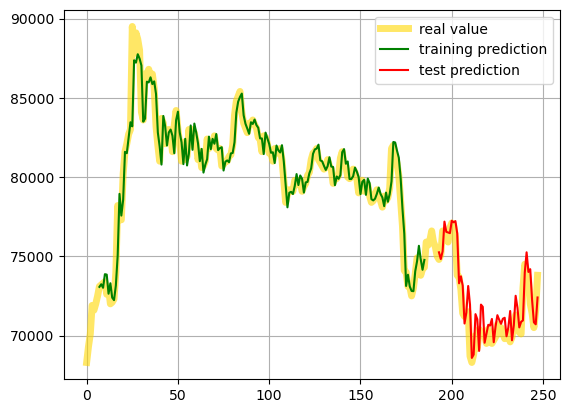

In [76]:
plt.plot(stock_data, linewidth = 5, alpha = 0.6, label = 'real value', color = 'gold')
# np.arrage(a, b ,c) : a부터 b까지 c간격으로 1d array 생성(b는 제외)
train_start_ind = 7
train_end_ind = 7 + len(y_train_pred_inv)
x_train_axis = np.arange(train_start_ind, train_end_ind, 1)
plt.plot(x_train_axis, y_train_pred_inv, color = 'green', label = 'training prediction')

test_start_ind = train_end_ind+num_past
test_end_ind = test_start_ind + len(y_test_pred_inv)
x_test_axis = np.arange(test_start_ind, test_end_ind, 1)
plt.plot(x_test_axis, y_test_pred_inv, color = 'red', label = 'test prediction')

plt.legend()
plt.grid()